# Segmentation Testing

A file which provides examples for testing and optimizing the segmentation process

In [1]:
from immas import segmentation, preprocessing, MammogramImage
from immas.basic_functions import show_image_plt
import numpy

In [2]:
help(segmentation.multithresholding)
help(segmentation.mean_shift)

Help on function multithresholding in module immas.segmentation:

multithresholding(img)
    Performs multi-thresholding to aid segmentation.
    
    Args:
    img: GRAYSCALE image file.
    
    Returns:
    thresholded_img (uint8): thresholded image file.

Help on function mean_shift in module immas.segmentation:

mean_shift(img, sp, sr)
    Performs mean shifting to aid segmentation.
    
    Args:
    img: image file.
    sp (int): The spatial window radius.
    sr (int): The color window radius.
    
    Returns:
    shifted_img (uint8, gray): shifted image file.



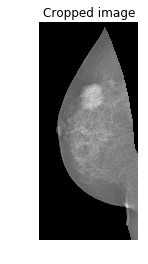

In [3]:
path_image = "../dataset/images/22579730_bbd6a3a35438c11b_MG_R_ML_ANON.tif"
path_mask = "../dataset/masks/20587080_b6a4f750c6df4f90_MG_R_ML_ANON.png"
pectoral_muscle = "../dataset/pectoral_muscle_masks/20587080_b6a4f750c6df4f90_MG_R_ML_ANON.tif"
mm = MammogramImage(path_image, path_mask, pmuscle_mask_path=pectoral_muscle)
show_image_plt(mm.image_data,'Cropped image')

## Implement Mean Shift

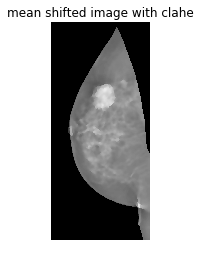

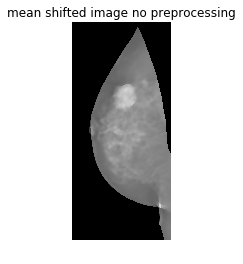

In [4]:
clahe = preprocessing.clahe(mm.image_data)
shifted_clahe = segmentation.mean_shift(clahe,20,30)
shifted = segmentation.mean_shift(mm.image_data,20,30)
show_image_plt(shifted_clahe,"mean shifted image with clahe")
show_image_plt(shifted,"mean shifted image no preprocessing")

## Implement multithresholding

C:\Users\mahle\Anaconda3\lib\site-packages\immas-1.0-py3.6.egg\immas\segmentation.py:49: RuntimeWarning: invalid value encountered in double_scalars


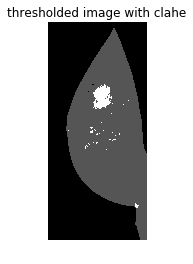

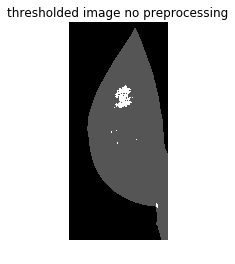

In [5]:
thresh_clahe = segmentation.multithresholding(clahe)
show_image_plt(thresh_clahe, 'thresholded image with clahe')
thresh = segmentation.multithresholding(mm.image_data)
show_image_plt(thresh, 'thresholded image no preprocessing')

## Turn Thresholded Image to Binary

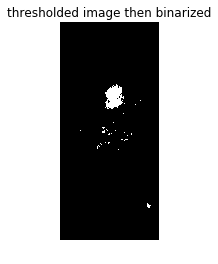

In [7]:
binary = segmentation.thresh_to_binary(thresh_clahe)
show_image_plt(binary, 'thresholded image then binarized')